In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/mario
!ls

/content/drive/My Drive/mario
logs  marioAI.ipynb  Model_0.zip  Model_1.zip  train


In [ ]:
!pip install gym-super-mario-bros
!pip install nes-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00
  Created wheel for nes-py: filename=nes_py-8.2.1-cp39-cp39-linux_x86_64.whl size=494966 sha256=35d79bb8039a8f834946d2d1d2fb875f1a11d6d88f75a0930b782d3e69ce2c80
  Stored in directory: /root/.cache/pip/wheels/c6/e1/4b/dbbd5d4a46ad80c0149d5671edb272c728c130e4d5750ca1d2
Successfully built nes-py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Setting up Mario**

In [ ]:
# Importing dependencies 
# the game
import gym_super_mario_bros
# Joypad wrapper
from nes_py.wrappers import JoypadSpace
# SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

KeyboardInterrupt: ignored

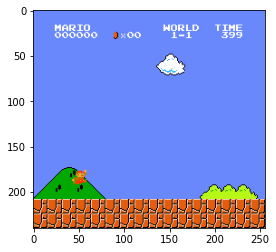

In [ ]:
env = gym.make('SuperMarioBros-v0')
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(100000):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

In [ ]:
#different actions
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [ ]:
#discrete button combinations to play
env.action_space

Discrete(7)

In [ ]:
#frame from the game
env.observation_space.shape

(240, 256, 3)

In [ ]:
SIMPLE_MOVEMENT[env.action_space.sample()] #getting random actions

NameError: ignored

In [ ]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

NoSuchDisplayException: ignored

In [ ]:
#installing pytorch
# MPS acceleration is available on MacOS 12.3+
!pip install torch torchvision torchaudio
# Install stable baselines for RL stuff
!pip install 'stable-baselines3[extra]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [ ]:
# creates base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# simplifies the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# grayscaling
env = GrayScaleObservation(env, keep_dim=True)
#Wrapping inside the Dummy Environment
env = DummyVecEnv([lambda: env])
#Stacking the frames
env = VecFrameStack(env, 4, channels_order='last')

In [ ]:
state = env.reset()

In [ ]:
state, reward, done, info = env.step([5])

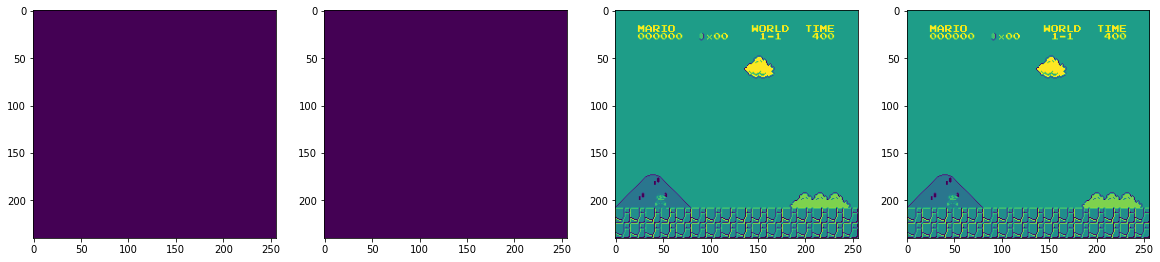

In [ ]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [ ]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [ ]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_p1_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [ ]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [ ]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [ ]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_12
----------------------------
| time/              |     |
|    fps             | 32  |
|    iterations      | 1   |
|    time_elapsed    | 15  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 2             |
|    time_elapsed         | 175           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 0.00016774004 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00159       |
|    learning_rate        | 1e-06         |
|    loss                 | 88.5          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000633     |
|    value_loss           | 283           |
------------------------

In [ ]:
model.save('Model_2')